In [67]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry.polygon import Polygon
from shapely import wkt
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
%pwd

'/Users/anne/Desktop/FORCE_hackathon2019/FORCE_Geolocation_Docs/notebooks'

In [3]:
if __name__ == "__main__":
    npd_data = pd.read_csv('../sample_data/with-coordinates.csv', delimiter=';')
    # npd_data.set_index(['wlbWellboreName'], drop=False)

    fields_test = gpd.read_file('../sample_data/shapefiles/loc_npd_fields.shp')
    print('here')

here


In [56]:
fields_test.head(10)

,OBJECTID,IDFIELD,FIELDNAME,IDDISCOVER,DISCNAME,MAPNUMBER,RESIDSCNME,IDINCINOTH,INC_IN_FLD,DSC_HCTYPE,...,fldRecov_4,fldRemaini,fldRemai_1,fldRemai_2,fldRemai_3,fldRemai_4,fldDateOff,fldNpdidFi,DatesyncNP,geometry
0,1,18116481.0,GUDRUN,43880.0,15/3-1 S Gudrun,9.0,None,0.0,YES,GAS/CONDENSATE,...,29.56,6.30,3.86,0.57,0.00,11.24,2017-12-31,18116481,2018-11-09,(POLYGON ((426917.8820975518 6520445.886970246...
1,2,43625.0,OSEBERG,44408.0,30/6-15 Oseberg Vest,10.0,30/6-1 Oseberg,44396.0,YES,OIL/GAS,...,537.96,22.19,64.95,2.89,0.00,92.63,2017-12-31,43625,2018-11-09,"(POLYGON ((486307.983376932 6710059.984499074,..."
2,3,43444.0,TOMMELITEN GAMMA,43856.0,1/9-4 Tommeliten Gamma,17.0,None,0.0,YES,GAS/CONDENSATE,...,14.64,0.00,0.00,0.00,0.00,0.00,2017-12-31,43444,2018-11-09,"POLYGON ((494736.471598152 6261565.697734931, ..."
3,4,43541.0,EDDA,44150.0,2/7-4 Edda,18.0,None,0.0,YES,OIL,...,7.20,0.00,0.00,0.00,0.00,0.00,2017-12-31,43541,2018-11-09,"(POLYGON ((507394.681498175 6256930.937786547,..."
4,5,43800.0,ULA,44972.0,7/12-2 Ula,20.0,None,0.0,YES,OIL,...,93.11,8.59,0.00,0.39,0.00,9.33,2017-12-31,43800,2018-11-09,"POLYGON ((491967.5274473843 6325001.752520611,..."
5,6,43765.0,Ã SGARD,44900.0,6506/12-1 SmÃ¸rbukk,21.0,6507/11-1 Midgard,44912.0,YES,GAS/CONDENSATE,...,425.30,9.91,51.08,9.83,0.00,79.67,2017-12-31,43765,2018-11-09,"POLYGON ((685645.2220654457 7238597.220423155,..."
6,7,43658.0,STATFJORD,44558.0,33/12-1 Statfjord,29.0,None,0.0,YES,OIL,...,704.80,4.83,5.97,2.90,-0.12,16.19,2017-12-31,43658,2018-11-09,"POLYGON ((443004.6113947498 6805428.06342785, ..."
7,8,43527.0,ELDFISK,44114.0,2/7-1 Eldfisk,31.0,None,0.0,YES,OIL,...,188.60,24.18,2.64,0.69,0.00,28.13,2017-12-31,43527,2018-11-09,(POLYGON ((519658.3747360316 6250714.707451166...
8,9,43672.0,STATFJORD ÃST,44582.0,33/9-7 Statfjord Ãst,32.0,None,0.0,YES,OIL,...,45.44,-0.19,0.31,0.69,0.00,1.43,2017-12-31,43672,2018-11-09,"POLYGON ((446255.591556832 6798229.995734592, ..."
9,10,43679.0,STATFJORD NORD,44588.0,33/9-8 Statfjord Nord,33.0,None,0.0,YES,OIL,...,45.37,2.68,-0.26,0.27,0.00,2.93,2017-12-31,43679,2018-11-09,(POLYGON ((446934.8394776708 6814876.129849661...


In [5]:
fields_test.shape

(263, 33)

In [ ]:
# fields_test.dtypes

In [65]:
# fields_test.plot(figsize=(20,10), color='black')

In [70]:
fields_test.geometry.head(10)

0    (POLYGON ((426917.8820975518 6520445.886970246...
1    (POLYGON ((486307.983376932 6710059.984499074,...
2    POLYGON ((494736.471598152 6261565.697734931, ...
3    (POLYGON ((507394.681498175 6256930.937786547,...
4    POLYGON ((491967.5274473843 6325001.752520611,...
5    POLYGON ((685645.2220654457 7238597.220423155,...
6    POLYGON ((443004.6113947498 6805428.06342785, ...
7    (POLYGON ((519658.3747360316 6250714.707451166...
8    POLYGON ((446255.591556832 6798229.995734592, ...
9    (POLYGON ((446934.8394776708 6814876.129849661...
Name: geometry, dtype: object

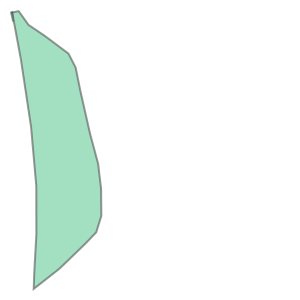

In [88]:
fields_test.geometry[37]

In [64]:
# Check original projection
# fields_test.crs

In [76]:
fields_explode = fields_test.geometry.explode()

In [77]:
type(fields_explode)

geopandas.geoseries.GeoSeries

In [78]:
fields_explode.shape

(286,)

In [79]:
fields_explode.head(20)

0   0    POLYGON ((426917.8820975518 6520445.886970246,...
    1    POLYGON ((426917.3135915835 6520450.216061042,...
1   0    POLYGON ((486307.983376932 6710059.984499074, ...
    1    POLYGON ((486305.583559292 6710061.357592083, ...
2   0    POLYGON ((494736.471598152 6261565.697734931, ...
3   0    POLYGON ((507394.681498175 6256930.937786547, ...
    1    POLYGON ((507394.8235829129 6256931.880511801,...
4   0    POLYGON ((491967.5274473843 6325001.752520611,...
5   0    POLYGON ((685645.2220654457 7238597.220423155,...
6   0    POLYGON ((443004.6113947498 6805428.06342785, ...
7   0    POLYGON ((519658.3747360316 6250714.707451166,...
    1    POLYGON ((517182.8558328501 6248269.034131933,...
8   0    POLYGON ((446255.591556832 6798229.995734592, ...
9   0    POLYGON ((446934.8394776708 6814876.129849661,...
    1    POLYGON ((446935.0791521827 6814875.801151536,...
10  0    POLYGON ((721000.0162499634 7208944.688556649,...
11  0    POLYGON ((470828.6102929704 6331526.726877844,.

In [85]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fields_explode)

0    0    POLYGON ((426917.8820975518 6520445.886970246,...
     1    POLYGON ((426917.3135915835 6520450.216061042,...
1    0    POLYGON ((486307.983376932 6710059.984499074, ...
     1    POLYGON ((486305.583559292 6710061.357592083, ...
2    0    POLYGON ((494736.471598152 6261565.697734931, ...
3    0    POLYGON ((507394.681498175 6256930.937786547, ...
     1    POLYGON ((507394.8235829129 6256931.880511801,...
4    0    POLYGON ((491967.5274473843 6325001.752520611,...
5    0    POLYGON ((685645.2220654457 7238597.220423155,...
6    0    POLYGON ((443004.6113947498 6805428.06342785, ...
7    0    POLYGON ((519658.3747360316 6250714.707451166,...
     1    POLYGON ((517182.8558328501 6248269.034131933,...
8    0    POLYGON ((446255.591556832 6798229.995734592, ...
9    0    POLYGON ((446934.8394776708 6814876.129849661,...
     1    POLYGON ((446935.0791521827 6814875.801151536,...
10   0    POLYGON ((721000.0162499634 7208944.688556649,...
11   0    POLYGON ((470828.6102929704 63

In [80]:
new_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(fields_explode))

In [81]:
new_gdf.head()

geometry
0 0  POLYGON ((426917.8820975518 6520445.886970246,...
  1  POLYGON ((426917.3135915835 6520450.216061042,...
1 0  POLYGON ((486307.983376932 6710059.984499074, ...
  1  POLYGON ((486305.583559292 6710061.357592083, ...
2 0  POLYGON ((494736.471598152 6261565.697734931, ...

In [82]:
new_gdf.shape

(286, 1)

In [83]:
new_gdf.dtypes

geometry    object
dtype: object

In [86]:
new_gdf['index1'] = new_gdf.index.get_level_values(0)
new_gdf['index2'] = new_gdf.index.get_level_values(1)

In [51]:
new_gdf.head(10)

geometry  index1  index2
0 0  POLYGON ((426917.8820975518 6520445.886970246,...       0       0
  1  POLYGON ((426917.3135915835 6520450.216061042,...       0       1
1 0  POLYGON ((486307.983376932 6710059.984499074, ...       1       0
  1  POLYGON ((486305.583559292 6710061.357592083, ...       1       1
2 0  POLYGON ((494736.471598152 6261565.697734931, ...       2       0
3 0  POLYGON ((507394.681498175 6256930.937786547, ...       3       0
  1  POLYGON ((507394.8235829129 6256931.880511801,...       3       1
4 0  POLYGON ((491967.5274473843 6325001.752520611,...       4       0
5 0  POLYGON ((685645.2220654457 7238597.220423155,...       5       0
6 0  POLYGON ((443004.6113947498 6805428.06342785, ...       6       0

In [ ]:
gdf_multip = new_gdf[new_gdf]

In [53]:
gdf_multip = new_gdf.loc[new_gdf['index2'] == 1]

In [54]:
gdf_multip.head()

,,geometry,index1,index2
0,1,"POLYGON ((426917.3135915835 6520450.216061042,...",0,1
1,1,"POLYGON ((486305.583559292 6710061.357592083, ...",1,1
3,1,"POLYGON ((507394.8235829129 6256931.880511801,...",3,1
7,1,"POLYGON ((517182.8558328501 6248269.034131933,...",7,1
9,1,"POLYGON ((446935.0791521827 6814875.801151536,...",9,1


In [17]:
# new_gdf.to_file(filename='polygon.geojson', driver='GeoJSON')

In [ ]:
# polygon_test.to_file(filename='polygon.geojson', driver='GeoJSON')
# polygon_test.to_file(filename='polygon.shp', driver="ESRI Shapefile")

In [ ]:
# gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())

In [ ]:
fields_test.crs

In [ ]:
fields_test.plot(figsize=(12,50))

In [ ]:
#gapminder = px.data.gapminder().query("year==2007")
#fig = px.choropleth(gapminder, locations="iso_alpha",
#                    color="lifeExp", # lifeExp is a column of gapminder
#                    hover_name="country", # column to add to hover information
#                    color_continuous_scale=px.colors.sequential.Plasma)
#fig.show()